# Homework 4 - Pawpularity

It's time to train your first model on ~cats~ real data. The dataset of cute pets is avaialble here -  [Pawpularity Contest - Predict the popularity of shelter pet photos](https://www.kaggle.com/c/petfinder-pawpularity-score/data)


Your task is to predict engagement with a pet's profile based on the photograph for that profile. You are also provided with hand-labelled metadata for each photo. The dataset for this competition therefore comprises both images and tabular data.

In this homework we'll only use tabular meta data. Our goal is to fit linear reggresion on binary features. Let's see if we can do it better than predicting a constant.
![PetFinder.my - Pawpularity Contest](https://www.petfinder.my/images/cuteness_meter-showcase.jpg)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,9)})
%matplotlib inline

In [4]:
data = pd.read_csv("/Users/dariyab/Downloads/train_1.csv")

In [5]:
data

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


Let's create train/test split. We keep 20% of data for testing model performance

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data.Pawpularity)
train.shape, test.shape

((7929, 14), (1983, 14))

In [7]:
# Check that you have the same train/test split as othersф
assert(train.iloc[5].Pawpularity == 13)
assert(train.iloc[-5].Face == 1)
assert(test.iloc[5].Group == 1)
assert(test.iloc[-5].Pawpularity == 39)

### Baseline

In [8]:
from sklearn.metrics import mean_squared_error

Create a copy for test dataset:

In [9]:
test = test.copy()

Set baseline based on mean/median/mode:

In [128]:
#test['baseline'] = 0 # try to use mean/median/mode as baseline
test['baseline'] = test.iloc[:,1:14].mean(axis = 1) #using the mean
#test['baseline'] = test.iloc[:,1:14].mode(axis = 1) #using the mode
#test['baseline'] = test.iloc[:,1:14].median(axis = 1) #using the median 
test.head()
#test.iloc[:,1:14]

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,baseline,pred,pred_1,pred_2,pred_3,pred_4
6600,aa46b7ed85e184850477dd773f2e01a0,0,1,1,1,0,0,0,0,0,0,0,0,38,3.153846,37.957221,37.975315,38.088649,37.959083,38.088649
3336,562c19b150a2ad83c75a22fb81e6513a,0,1,1,0,0,0,0,0,0,0,0,0,2,0.307692,37.940408,38.013470,38.088649,37.949929,38.088649
4785,7b2a921cc744aecdd5d4a77ebf3a3d9c,0,1,1,1,0,0,0,0,1,1,0,0,42,3.615385,37.928493,37.934131,38.088649,37.929036,38.088649
2128,36e737146cadf7efd80eb95680e7dc86,0,1,1,1,0,0,0,0,1,0,0,0,24,2.153846,38.177026,38.156081,38.088649,38.175133,38.088649
4162,6a3eb0bb4ff8813da1470a9137f4830d,0,1,1,1,0,0,0,0,0,0,0,0,45,3.692308,37.957221,37.975315,38.088649,37.959083,38.088649


In [129]:
mean_squared_error(test.Pawpularity, test.baseline, squared=False)

39.72876680191165

## Conclusion: Using the mean for the baseline gave the lowest error (when comparing to median, mode, mean)

### Regression

Let's try to train linear regression on binary features

In [14]:
features = data.columns[1:-1]
features

Index(['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group',
       'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],
      dtype='object')

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [23]:
#Making the testing and the training matrices: 
X_train = train.iloc[:,1:13] 
y_train = train['Pawpularity']
X_test = test.iloc[:,1:13]
y_test = test['Pawpularity']

In [28]:
model = LinearRegression() # Compare several regression models, select the best. Don't forget to tune hyper params

In [32]:
#Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept':[True, False]}
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [35]:
# Train your model here:
grid_search.fit(X_train, y_train) 

#Best hyper params and model

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [38]:
#Evaluate the model 
test['pred'] = best_model.predict(X_test)
test.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,baseline,pred
6600,aa46b7ed85e184850477dd773f2e01a0,0,1,1,1,0,0,0,0,0,0,0,0,38,0.250000,37.957221
3336,562c19b150a2ad83c75a22fb81e6513a,0,1,1,0,0,0,0,0,0,0,0,0,2,0.166667,37.940408
4785,7b2a921cc744aecdd5d4a77ebf3a3d9c,0,1,1,1,0,0,0,0,1,1,0,0,42,0.416667,37.928493
2128,36e737146cadf7efd80eb95680e7dc86,0,1,1,1,0,0,0,0,1,0,0,0,24,0.333333,38.177026
4162,6a3eb0bb4ff8813da1470a9137f4830d,0,1,1,1,0,0,0,0,0,0,0,0,45,0.250000,37.957221


Calculate score:

In [40]:
#Score the error
validation_score = mean_squared_error(test.Pawpularity, test.pred, squared=False)
validation_score

20.61321128289376

Check params:

In [47]:
list(zip(features, best_model.coef_)) # model's weights

[('Subject Focus', -1.318419194122806),
 ('Eyes', -1.9247962162298953),
 ('Face', 2.107441598807369),
 ('Near', 0.01681275070247775),
 ('Action', -0.9241970093570018),
 ('Accessory', 1.2659010714806034),
 ('Group', 1.1052053508763255),
 ('Collage', 0.6555508044163146),
 ('Human', 0.2198050189211258),
 ('Occlusion', -0.24853320175797705),
 ('Info', -1.4531318086129814),
 ('Blur', -3.957873216082745)]

In [48]:
best_model.intercept_ # model's bias

37.75776263342274

Analyze errors: 

<Axes: xlabel='pred', ylabel='Pawpularity'>

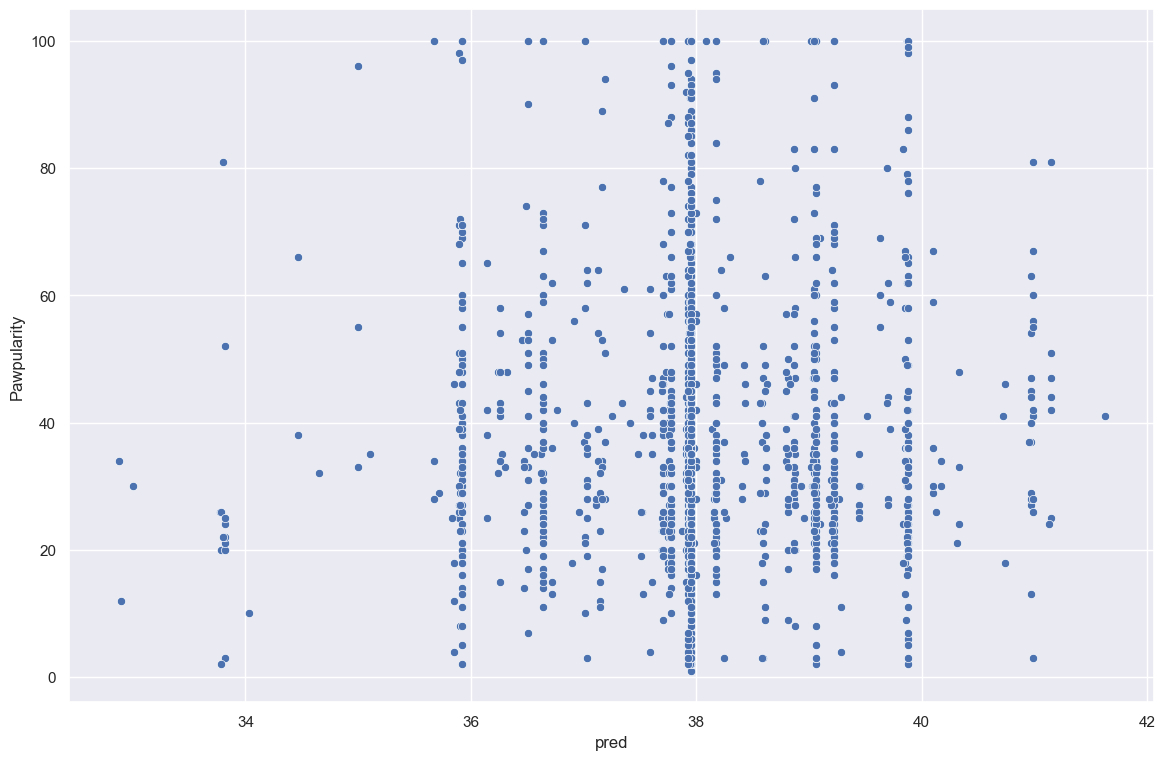

In [49]:
## True value / pred value plot:
sns.scatterplot(x=test.pred, y=test.Pawpularity)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

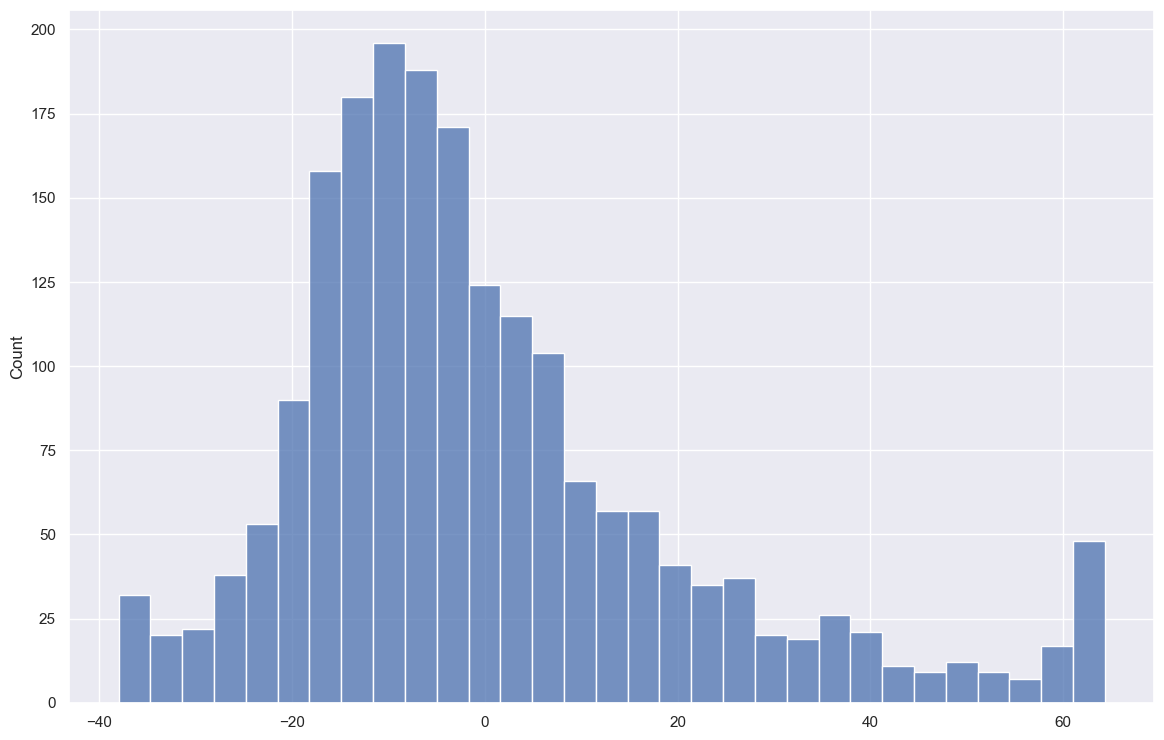

In [50]:
## Errors distribution:
sns.histplot(test.Pawpularity - test.pred)

### Ridge Regression (L2 Regularization)


**Compare several regression models (L1, L2 regularization), select the best. Don't forget to tune hyperparams**

Print your best score and what type of regression you used to achieve it:

In [51]:
model = Ridge()
param_grid = {'alpha':[0.1, 1, 10, 100]} #for Ridge the parameter is alpha 
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Train your model here:
grid_search.fit(X_train, y_train) 

#Best hyper params and model

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
test['pred_1'] = best_model.predict(X_test)
test.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,baseline,pred,pred_1
6600,aa46b7ed85e184850477dd773f2e01a0,0,1,1,1,0,0,0,0,0,0,0,0,38,0.250000,37.957221,37.975315
3336,562c19b150a2ad83c75a22fb81e6513a,0,1,1,0,0,0,0,0,0,0,0,0,2,0.166667,37.940408,38.013470
4785,7b2a921cc744aecdd5d4a77ebf3a3d9c,0,1,1,1,0,0,0,0,1,1,0,0,42,0.416667,37.928493,37.934131
2128,36e737146cadf7efd80eb95680e7dc86,0,1,1,1,0,0,0,0,1,0,0,0,24,0.333333,38.177026,38.156081
4162,6a3eb0bb4ff8813da1470a9137f4830d,0,1,1,1,0,0,0,0,0,0,0,0,45,0.250000,37.957221,37.975315


In [52]:
#Score the error
validation_score = mean_squared_error(test.Pawpularity, test.pred_1, squared=False)
validation_score

20.61294879683022

In [53]:
list(zip(features, best_model.coef_)) # model's weights

[('Subject Focus', -0.8925426552891131),
 ('Eyes', -1.1992253552010486),
 ('Face', 1.373433084256113),
 ('Near', -0.038155717464673326),
 ('Action', -0.37945313448631884),
 ('Accessory', 1.0356854185888313),
 ('Group', 0.9758886627191506),
 ('Collage', 0.38061348904257214),
 ('Human', 0.18076672194720336),
 ('Occlusion', -0.22195009180881456),
 ('Info', -1.0721064790359542),
 ('Blur', -2.862923795141553)]

<Axes: xlabel='pred_1', ylabel='Pawpularity'>

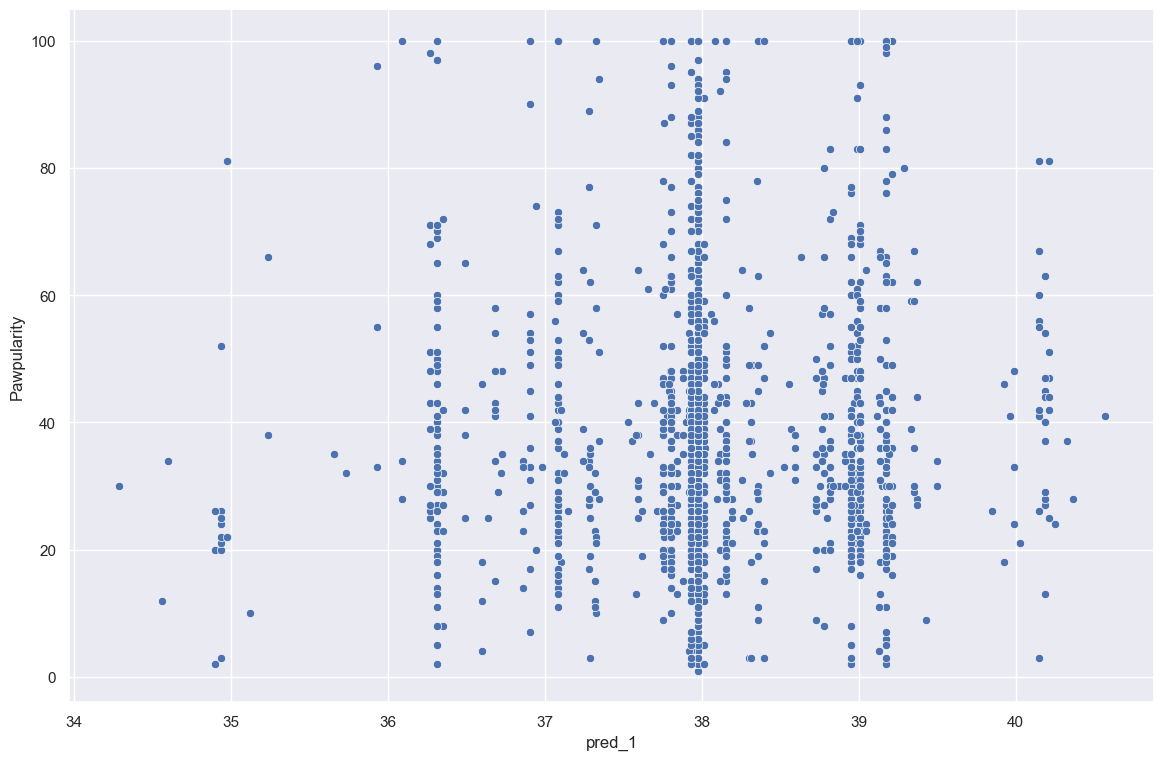

In [61]:
sns.scatterplot(x=test.pred_1, y=test.Pawpularity)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

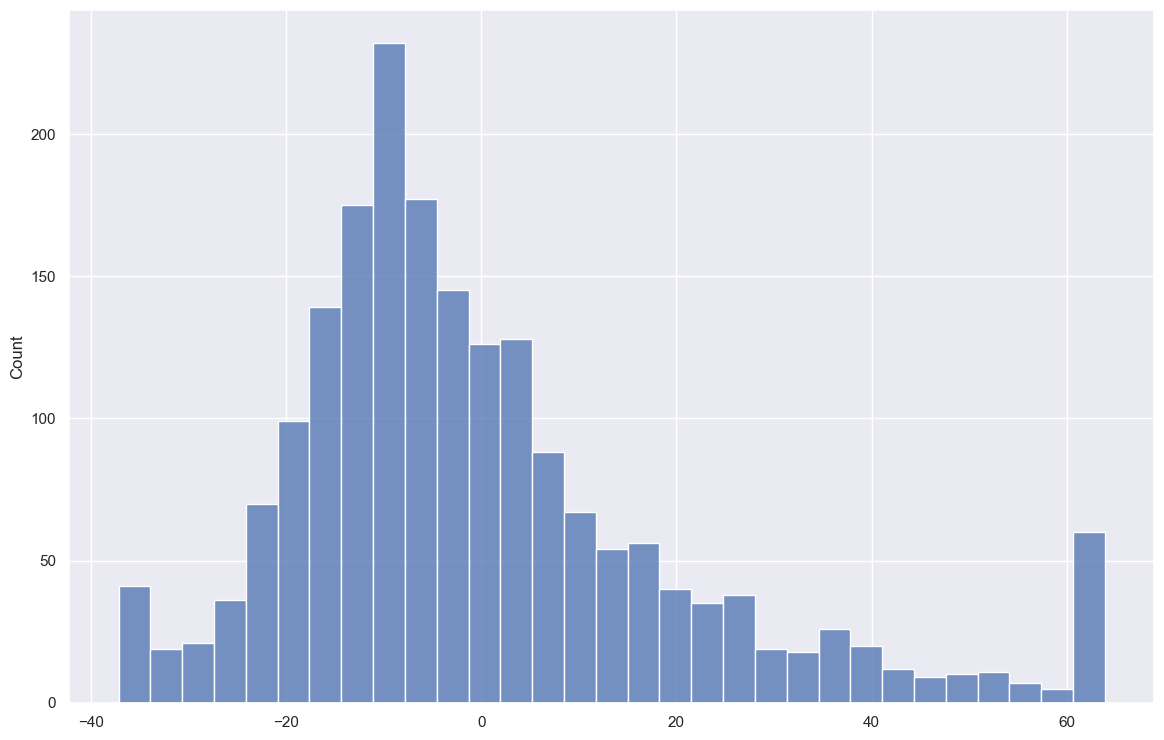

In [62]:
sns.histplot(test.Pawpularity - test.pred_1)

### Lasso Regression (L1 Regularization)


In [58]:
model = Lasso()
param_grid = {'alpha':[0.1, 1, 10, 100]} #for Lasso the parameter is also alpha
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Train your model here:
grid_search.fit(X_train, y_train) 

#Best hyper params and model

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
test['pred_2'] = best_model.predict(X_test)

print(best_params, best_model.intercept_)# model's bias
test.head(10)

{'alpha': 0.1} 38.088649423949406


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,baseline,pred,pred_1,pred_2
6600,aa46b7ed85e184850477dd773f2e01a0,0,1,1,1,0,0,0,0,0,0,0,0,38,0.250000,37.957221,37.975315,38.088649
3336,562c19b150a2ad83c75a22fb81e6513a,0,1,1,0,0,0,0,0,0,0,0,0,2,0.166667,37.940408,38.013470,38.088649
4785,7b2a921cc744aecdd5d4a77ebf3a3d9c,0,1,1,1,0,0,0,0,1,1,0,0,42,0.416667,37.928493,37.934131,38.088649
2128,36e737146cadf7efd80eb95680e7dc86,0,1,1,1,0,0,0,0,1,0,0,0,24,0.333333,38.177026,38.156081,38.088649
4162,6a3eb0bb4ff8813da1470a9137f4830d,0,1,1,1,0,0,0,0,0,0,0,0,45,0.250000,37.957221,37.975315,38.088649
5013,812cece02be2b28a199e047e58ad9871,0,1,1,1,0,0,1,0,0,0,0,0,34,0.333333,39.062426,38.951203,38.216490
7609,c440a1c202a595eebb82f4047864d17b,0,0,0,0,0,0,0,0,1,1,1,0,35,0.250000,36.275903,36.725973,38.088649
8569,ddf9e89d2657e9dc7eddaeadaeff47be,0,0,0,0,0,0,0,1,0,0,1,0,26,0.166667,36.960182,37.147770,38.088649
9866,fe8840e7e4a45b20d7e226397f03da3a,0,1,1,1,0,0,0,0,1,1,0,0,27,0.416667,37.928493,37.934131,38.088649
5629,90ee4afe97791896911aa6c2ba836364,0,1,1,1,0,0,0,0,0,0,0,0,36,0.250000,37.957221,37.975315,38.088649


In [59]:
#Score the error
validation_score = mean_squared_error(test.Pawpularity, test.pred_2, squared=False)
validation_score

20.620434481359684

In [60]:
list(zip(features, best_model.coef_)) # model's weights

[('Subject Focus', -0.0),
 ('Eyes', -0.0),
 ('Face', 0.0),
 ('Near', -0.0),
 ('Action', -0.0),
 ('Accessory', 0.0),
 ('Group', 0.12784063790222827),
 ('Collage', 0.0),
 ('Human', -0.0),
 ('Occlusion', -0.0),
 ('Info', -0.0),
 ('Blur', -1.001265673558339)]

<Axes: xlabel='pred_2', ylabel='Pawpularity'>

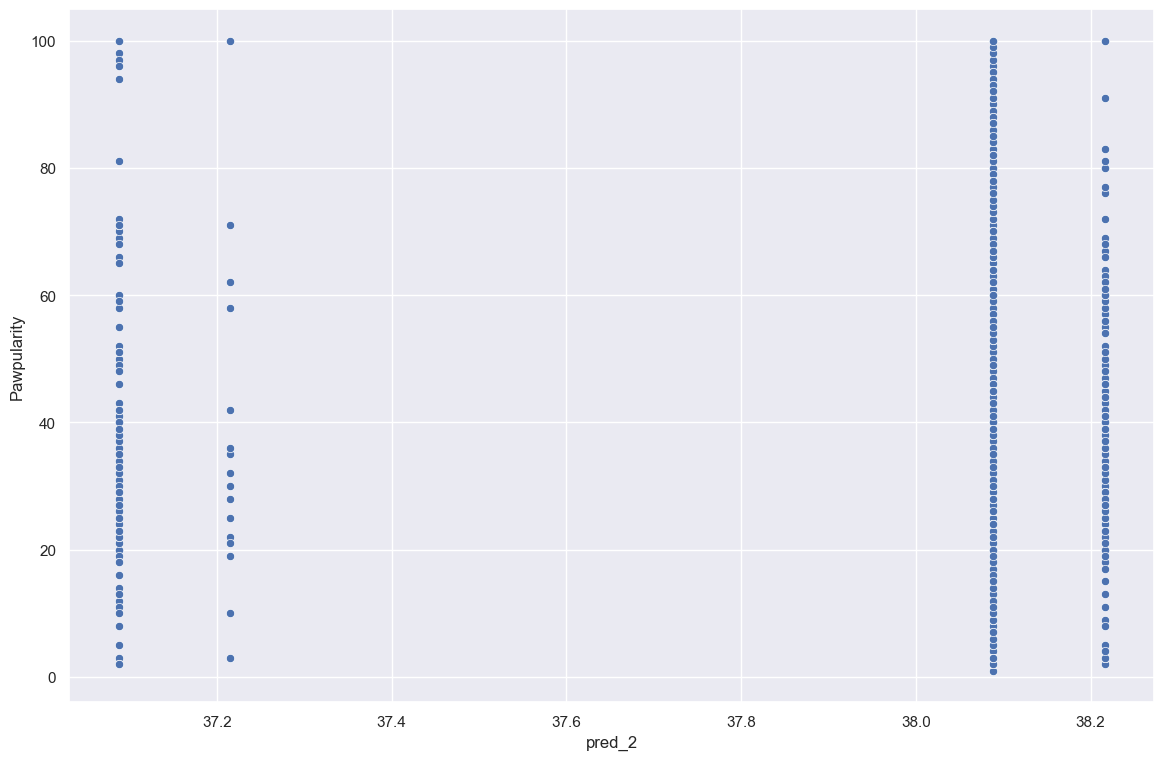

In [64]:
sns.scatterplot(x=test.pred_2, y=test.Pawpularity)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

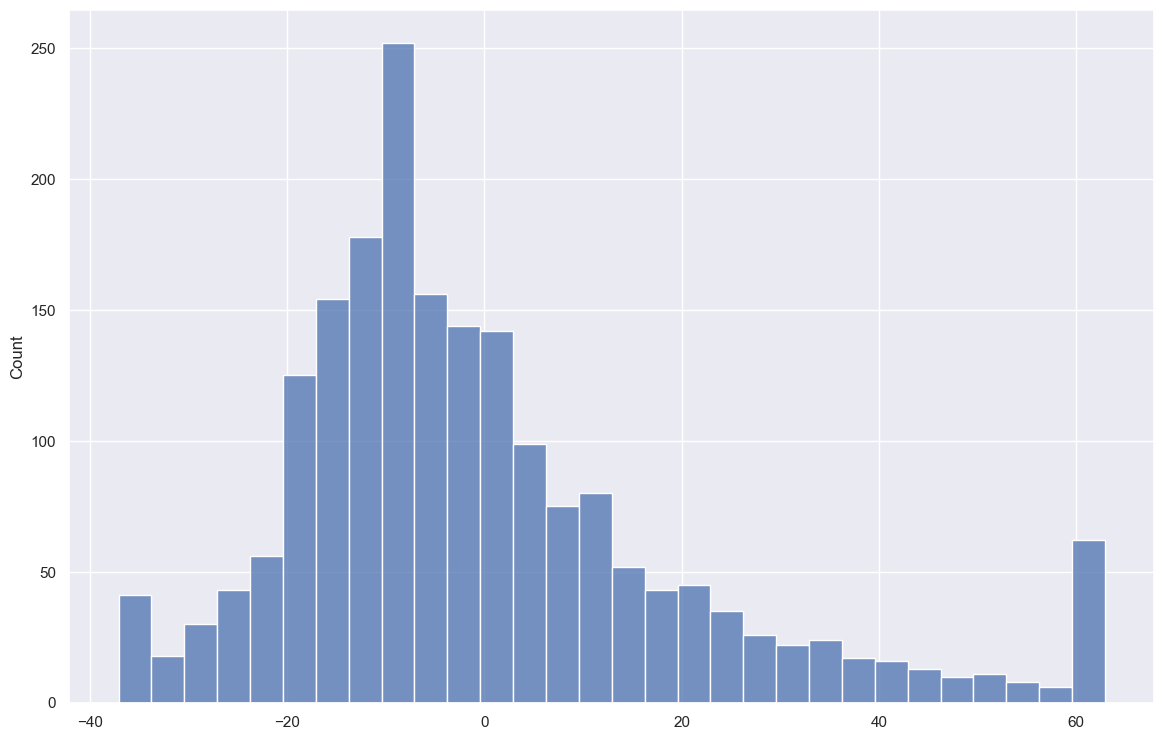

In [65]:
sns.histplot(test.Pawpularity - test.pred_2)

## The best predictions came from either Linear regression or Ridge regression. But Lasso regression also performed well 

### Polinomial Regression
Do polynomial features improve the score?

In [68]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import PolynomialFeatures

[make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) helps to combine several steps into one model

In [98]:
#first we'll try degree = 2 and use the Linear or Ridge regression
model = make_pipeline(
    PolynomialFeatures(), 
    Ridge()
)
param_grid = {'polynomialfeatures__degree': [1,2,3,4,5], 'ridge__alpha': [0.1,1,10]}
grid_search = GridSearchCV(model, param_grid, scoring = 'neg_mean_squared_error', cv = 5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



In [99]:
test['pred_3'] = best_model.predict(X_test)

test.head(10)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,baseline,pred,pred_1,pred_2,pred_3
6600,aa46b7ed85e184850477dd773f2e01a0,0,1,1,1,0,0,0,0,0,0,0,0,38,0.250000,37.957221,37.975315,38.088649,37.959083
3336,562c19b150a2ad83c75a22fb81e6513a,0,1,1,0,0,0,0,0,0,0,0,0,2,0.166667,37.940408,38.013470,38.088649,37.949929
4785,7b2a921cc744aecdd5d4a77ebf3a3d9c,0,1,1,1,0,0,0,0,1,1,0,0,42,0.416667,37.928493,37.934131,38.088649,37.929036
2128,36e737146cadf7efd80eb95680e7dc86,0,1,1,1,0,0,0,0,1,0,0,0,24,0.333333,38.177026,38.156081,38.088649,38.175133
4162,6a3eb0bb4ff8813da1470a9137f4830d,0,1,1,1,0,0,0,0,0,0,0,0,45,0.250000,37.957221,37.975315,38.088649,37.959083
5013,812cece02be2b28a199e047e58ad9871,0,1,1,1,0,0,1,0,0,0,0,0,34,0.333333,39.062426,38.951203,38.216490,39.049982
7609,c440a1c202a595eebb82f4047864d17b,0,0,0,0,0,0,0,0,1,1,1,0,35,0.250000,36.275903,36.725973,38.088649,36.337887
8569,ddf9e89d2657e9dc7eddaeadaeff47be,0,0,0,0,0,0,0,1,0,0,1,0,26,0.166667,36.960182,37.147770,38.088649,36.982478
9866,fe8840e7e4a45b20d7e226397f03da3a,0,1,1,1,0,0,0,0,1,1,0,0,27,0.416667,37.928493,37.934131,38.088649,37.929036
5629,90ee4afe97791896911aa6c2ba836364,0,1,1,1,0,0,0,0,0,0,0,0,36,0.250000,37.957221,37.975315,38.088649,37.959083


In [100]:
print(best_params)
#Score the error
validation_score = mean_squared_error(test.Pawpularity, test.pred_3, squared=False)
validation_score

{'polynomialfeatures__degree': 1, 'ridge__alpha': 10}


20.612948540263446

In [101]:
# Hint: to check wieght use:

#list(zip(t.get_feature_names(input_features=features), best_model.steps[1][1].coef_)) # model's weights


features_poly = best_model.named_steps['polynomialfeatures'].get_feature_names_out(input_features=features)
coefficients = best_model.named_steps['ridge'].coef_
features_and_coefficients = list(zip(features_poly, coefficients))

features_and_coefficients

[('1', 0.0),
 ('Subject Focus', -1.2588756657160571),
 ('Eyes', -1.8220452208927171),
 ('Face', 2.0028745178072063),
 ('Near', 0.009153710720506109),
 ('Action', -0.8114670601473332),
 ('Accessory', 1.2378184008702624),
 ('Group', 1.090898980194601),
 ('Collage', 0.6145434474528664),
 ('Human', 0.21605059292963444),
 ('Occlusion', -0.2460977152775059),
 ('Info', -1.4011656091343372),
 ('Blur', -3.8075641004177503)]

Print your best score with pollinomial reggresion:

### Best score with polynomial regression: 20.612

### Feature selection

Let's use Lasso for feature selection. Sklearn's [SelectFromModel](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel) will help

In [97]:
from sklearn.feature_selection import SelectFromModel ## 

model = make_pipeline(
    PolynomialFeatures(),
    SelectFromModel(Lasso()),
    Lasso()
)

In [111]:

param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4, 5], 'lasso__alpha': [0.1, 1, 10], 'selectfrommodel__threshold': ['mean', 'median']}
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



In [106]:
test['pred_4'] = best_model.predict(X_test)

test.head(10)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,baseline,pred,pred_1,pred_2,pred_3,pred_4
6600,aa46b7ed85e184850477dd773f2e01a0,0,1,1,1,0,0,0,0,0,0,0,0,38,0.250000,37.957221,37.975315,38.088649,37.959083,38.088649
3336,562c19b150a2ad83c75a22fb81e6513a,0,1,1,0,0,0,0,0,0,0,0,0,2,0.166667,37.940408,38.013470,38.088649,37.949929,38.088649
4785,7b2a921cc744aecdd5d4a77ebf3a3d9c,0,1,1,1,0,0,0,0,1,1,0,0,42,0.416667,37.928493,37.934131,38.088649,37.929036,38.088649
2128,36e737146cadf7efd80eb95680e7dc86,0,1,1,1,0,0,0,0,1,0,0,0,24,0.333333,38.177026,38.156081,38.088649,38.175133,38.088649
4162,6a3eb0bb4ff8813da1470a9137f4830d,0,1,1,1,0,0,0,0,0,0,0,0,45,0.250000,37.957221,37.975315,38.088649,37.959083,38.088649
5013,812cece02be2b28a199e047e58ad9871,0,1,1,1,0,0,1,0,0,0,0,0,34,0.333333,39.062426,38.951203,38.216490,39.049982,38.216490
7609,c440a1c202a595eebb82f4047864d17b,0,0,0,0,0,0,0,0,1,1,1,0,35,0.250000,36.275903,36.725973,38.088649,36.337887,38.088649
8569,ddf9e89d2657e9dc7eddaeadaeff47be,0,0,0,0,0,0,0,1,0,0,1,0,26,0.166667,36.960182,37.147770,38.088649,36.982478,38.088649
9866,fe8840e7e4a45b20d7e226397f03da3a,0,1,1,1,0,0,0,0,1,1,0,0,27,0.416667,37.928493,37.934131,38.088649,37.929036,38.088649
5629,90ee4afe97791896911aa6c2ba836364,0,1,1,1,0,0,0,0,0,0,0,0,36,0.250000,37.957221,37.975315,38.088649,37.959083,38.088649


In [113]:
# Evaluate the best model on the validation set
print(best_params) 
#Score the error
validation_score = mean_squared_error(test.Pawpularity, test.pred_4, squared=False)
validation_score, best_model

{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 1, 'selectfrommodel__threshold': 'mean'}


(20.620434481359684,
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                 ('selectfrommodel',
                  SelectFromModel(estimator=Lasso(), threshold='mean')),
                 ('lasso', Lasso(alpha=0.1))]))

Print your best score with feature selection:

### Best score with feature selection: 20.62 as well. Hasn't really changed. 
#### Explanation: Applying feature selection did not significantly change the score achieved by the polynomial regression model. The best score without feature selection was 20.612, and this score remained relatively unchanged even after selecting a subset of the most important features. This could be because the polynomial features already capture complexity. Since polynomial regression already extends the feature set by including combinations and powers of existing features, applying additional feature selection may not yield significant improvements. The model could already be benefiting from the expanded feature space, making it less sensitive to which specific original features are included or excluded.